In [1]:
import tensorflow as tf 

2023-09-07 10:56:31.385463: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-07 10:56:31.410903: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 10:56:31.595193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 10:56:31.596122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 10:56:32.585321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
path = "/home/pa1/Documents/fuseextract/Document-Classifier/data/raw"
dataset = tf.keras.preprocessing.image_dataset_from_directory(path)
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123
)
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 87 files belonging to 3 classes.
Found 87 files belonging to 3 classes.
Using 70 files for training.
Found 87 files belonging to 3 classes.
Using 17 files for validation.


In [5]:
# define the batch size and print the image labels 
import tensorflow_datasets as tfds 
batch_size = 64 

dataset_name = dataset 
class_names = dataset.class_names
print(class_names)

['Citizenship', 'License', 'Passport']


In [30]:
num_classes = len(class_names)

In [31]:
# resize your images and standardize data for the nn 

# standardize the data 
size = (512,512)
ds_train = ds_train.map(lambda image , label: (tf.image.resize(image, size), label))
ds_val = ds_val.map(lambda image , label: (tf.image.resize(image, size), label))

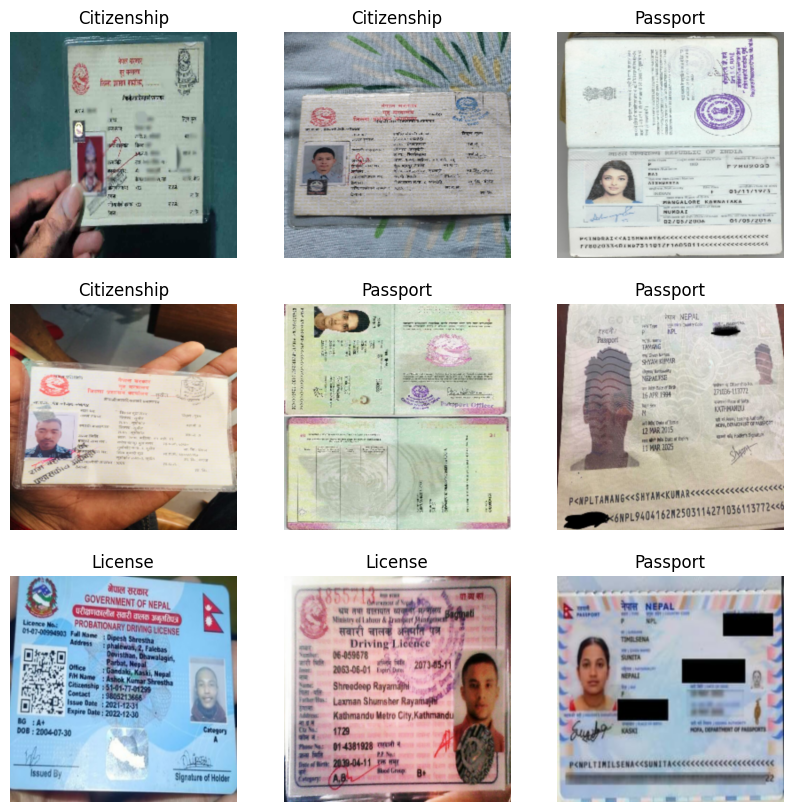

In [32]:
# display the first 9 images 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for images , labels in ds_train.take(1): 
    for i in range(9): 
        ax  = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [33]:
# do further preprocessing to increase the instances of the models 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 


In [34]:
data_augmentation = Sequential(
    [
        layers.RandomFlip('horizontal'), 
        layers.RandomRotation(0.1), 
        layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor= (-0.2,-0.3), interpolation= 'bilinear'), 
        layers.RandomContrast(factor = 0.1), 
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
    ], 
    name = "image",
)

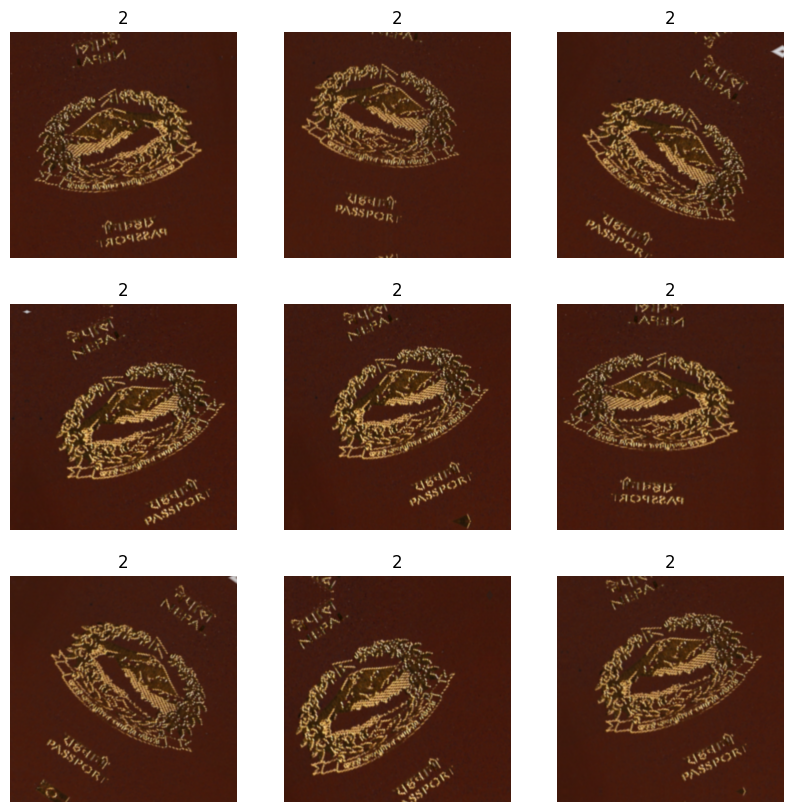

In [35]:
import numpy as np 
for images, labels in ds_train.take(1): 
    plt.figure(figsize= (10,10))
    first_image = images[0]
    def f(x): 
        return int(x)
    f2 = np.vectorize(f)
    for i in range(9): 
        ax = plt.subplot(3,3,i+1)
        augmented_image = image(tf.expand_dims(first_image, 0), training =True)
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(f2(labels[0]))
        plt.axis("off")

In [37]:
# Create the model
model = tf.keras.Sequential([
    data_augmentation,
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (Sequential)          (None, 512, 512, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 256, 256, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)     

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
epochs = 10  # You can adjust the number of epochs
history = model.fit(ds_train, validation_data=ds_val, epochs=epochs)

Epoch 1/10


3/3 [==============================] - 6s 1s/step - loss: 9.3571 - accuracy: 0.2857 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 7/10
3/3 [==============================] - 5s 1s/step - loss: 8.9801 - accuracy: 0.4429 - val_loss: 12.3256 - val_accuracy: 0.2353
Epoch 8/10
3/3 [=============================

In [40]:
test_loss, test_accuracy = model.evaluate(ds_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 275ms/step - loss: 12.3256 - accuracy: 0.2353
Test accuracy: 23.53%


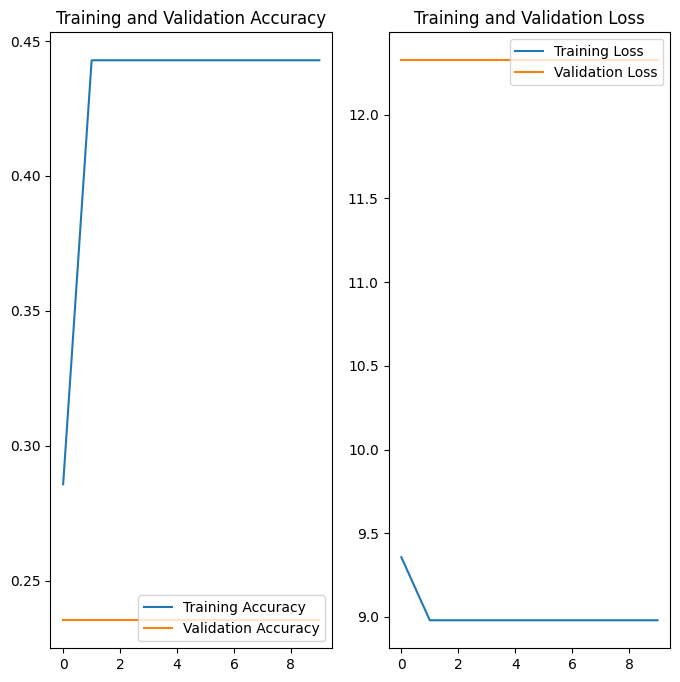

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show() 

In [43]:
# here the model performance is very low 
# accuracy is 42% while the test accuracy is 23%. 